----


# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


## Creating helper function for plotting 


In [2]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




## Matrix column entries (attributes):  
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- Five measures of variation in Frequency
    - MDVP:Jitter(%) - Percentage of cycle-to-cycle variability of the period duration
    - MDVP:Jitter(Abs) - Absolute value of cycle-to-cycle variability of the period duration
    - MDVP:RAP - Relative measure of the pitch disturbance
    - MDVP:PPQ - Pitch perturbation quotient
    - Jitter:DDP - Average absolute difference of differences between jitter cycles
- Six measures of variation in amplitude
    - MDVP:Shimmer - Variations in the voice amplitdue
    - MDVP:Shimmer(dB) - Variations in the voice amplitdue in dB
    - Shimmer:APQ3 - Three point amplitude perturbation quotient measured against the average of the three amplitude
    - Shimmer:APQ5 - Five point amplitude perturbation quotient measured against the average of the three amplitude
    - MDVP:APQ - Amplitude perturbation quotient from MDVP
    - Shimmer:DDA - Average absolute difference between the amplitudes of consecutive periods
- Two measures of ratio of noise to tonal components in the voice
    - NHR - Noise-to-harmonics Ratio and 
    - HNR - Harmonics-to-noise Ratio
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- Two nonlinear dynamical complexity measures
    - RPDE - Recurrence period density entropy
    - D2 - correlation dimension
- DFA - Signal fractal scaling exponent
- Three nonlinear measures of fundamental frequency variation
    - spread1 - discrete probability distribution of occurrence of relative semitone variations
    - spread2 - Three nonlinear measures of fundamental frequency variation
    - PPE - Entropy of the discrete probability distribution of occurrence of relative semitone variations


# Loading data


In [3]:
data = pd.read_csv("dataset/parkinsons.csv", sep=',', index_col='name') # assign index column to name 
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## we can see the number of samples 


In [4]:
print(data.shape)

(195, 23)


## To improve our understanding of the variables involved in parkinson detection, we first need to analyze the relationships within the data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with parkinson status. Additionally, random forest models can help identify the importance of different features in predicting the target variable (parkinson).


<Axes: >

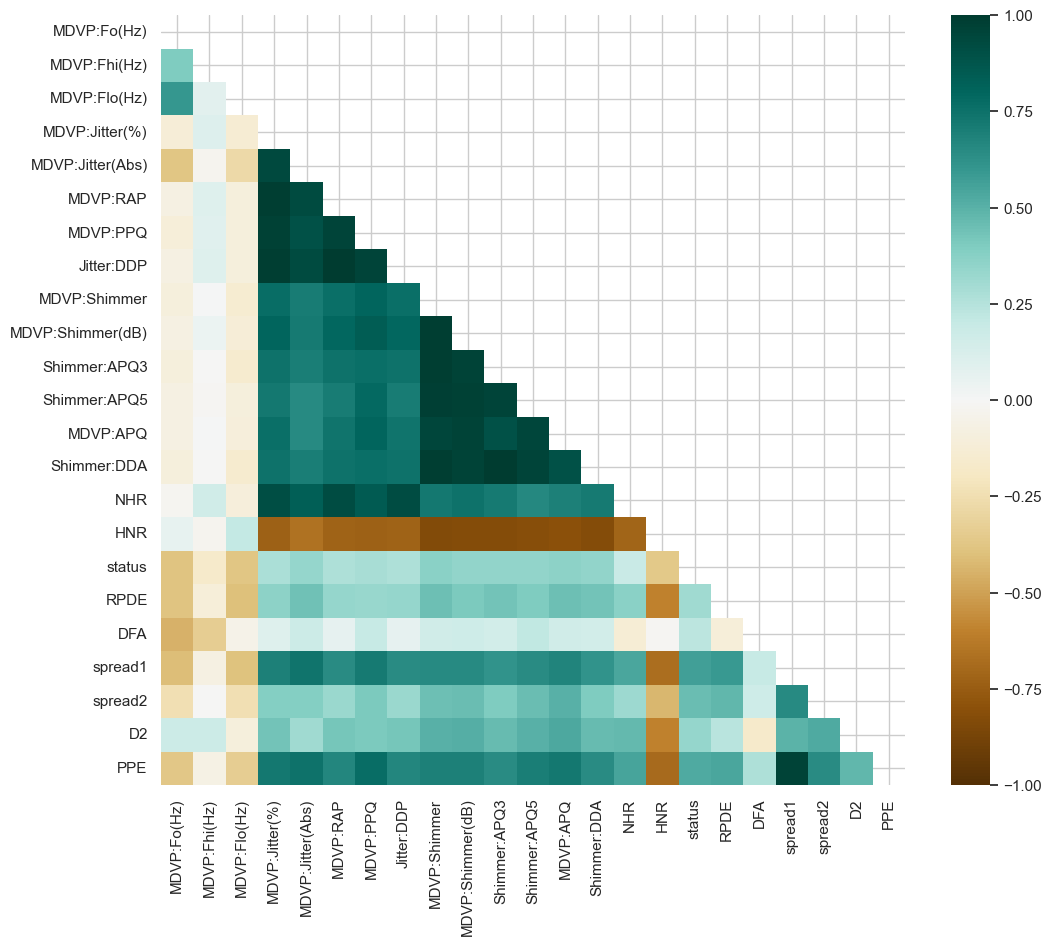

In [5]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

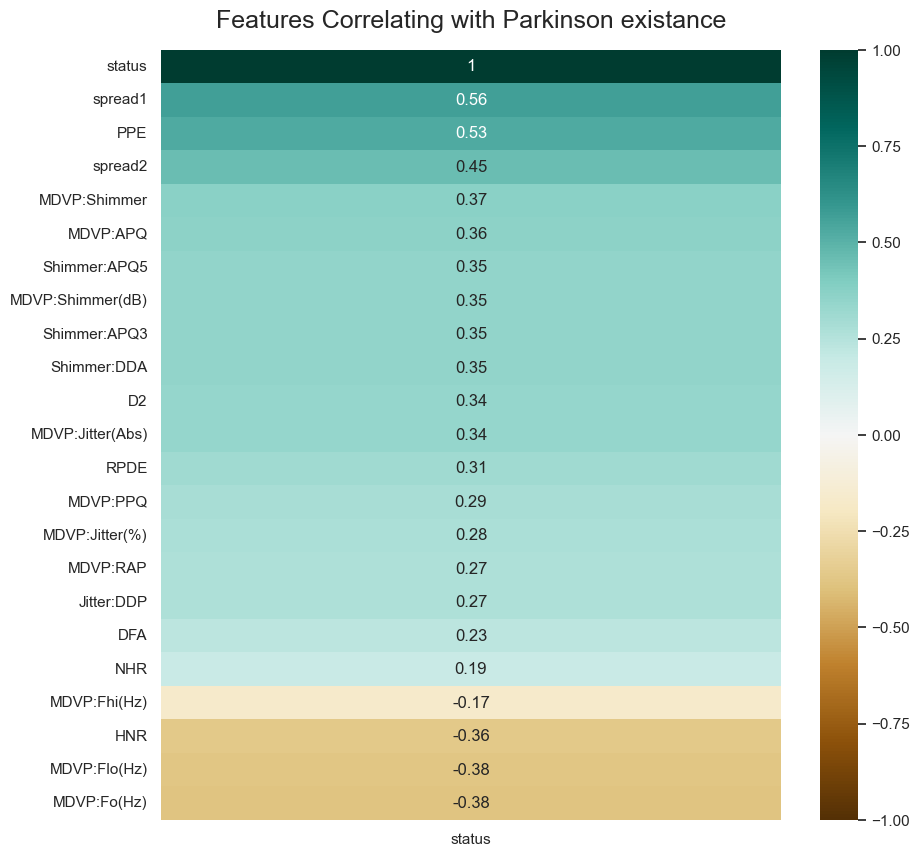

In [6]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

## Let's get the  features we select all columns in the dataset except for the `status` column. This is done using the ```drop``` method, which returns a new DataFrame with the specified columns (in this case, 'status') removed. The `axis=1` argument indicates that we're dropping a column, not a row.


In [7]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## The   Health status of the subject (one) - Parkinson's, (zero) - healthy  is given in the ```status``` column:


In [8]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

### we can see that 3/4 of the samples are have Parkinson's


In [9]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

## t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets. It is particularly useful for visualizing complex data structures, as it helps to project the data points from a high-dimensional space to a lower-dimensional space (usually 2D or 3D) while preserving the relationships between the data points as much as possible. Lets apply it to our dataset:


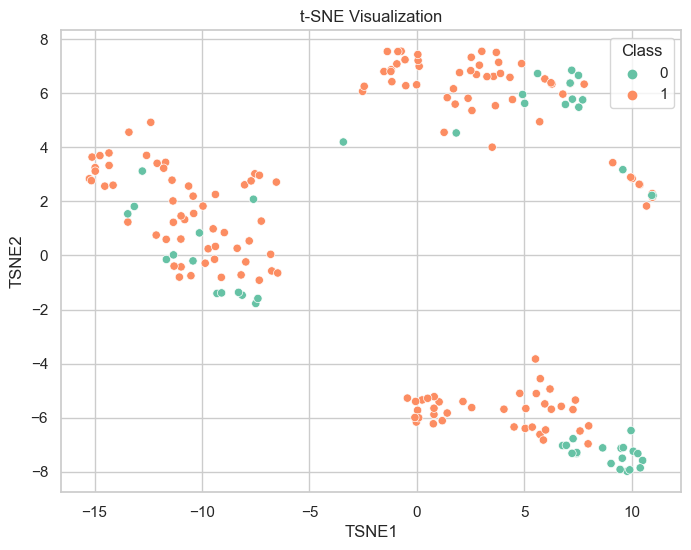

In [10]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

# Data preparation

## Here, we are splitting a dataset into independent and dependent variables, and then splitting it further into training and testing sets.


In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Logistic Regression


## here's an example code for fitting a logistic regression model using scikit-learn , first we import ```LogisticRegression```


In [13]:
from sklearn.linear_model import LogisticRegression

 ## We create and fit logistic regression model ```lr``` and fit it 


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## we can make a prediction on the first ten samples


In [15]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## We can get a probability of belonging to a each class for each sample, here are the first ten 


In [16]:
lr.predict_proba(X_test)[0:10]


array([[0.06917115, 0.93082885],
       [0.21985982, 0.78014018],
       [0.0059171 , 0.9940829 ],
       [0.25863898, 0.74136102],
       [0.17033646, 0.82966354],
       [0.07573081, 0.92426919],
       [0.02626649, 0.97373351],
       [0.12008009, 0.87991991],
       [0.11028285, 0.88971715],
       [0.4698579 , 0.5301421 ]])

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## We can display the confusion matrix as well as a classification report 


Confusion matrix, without normalization
[[ 3  4]
 [ 0 32]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


Accuracy Score: 0.8974358974358975


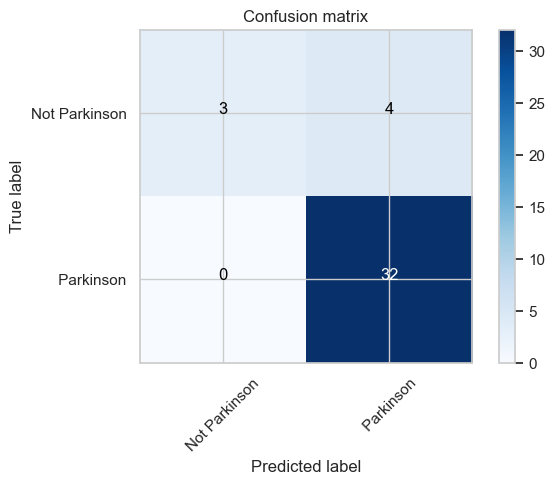

In [18]:
accuracies = {}

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
acc = lr.score(X_test,y_test)*100
accuracies['Random Forest'] = acc

## While grid search can be used to optimize hyperparameters for many machine learning algorithms, the hyperparameters in logistic regression may not be particularly insightful. Instead, we can use logistic regression to identify feature importance, as the coefficients learned during training can reveal which features are most strongly associated with the target variable. We can obtain the coefficients.


In [19]:
coef=abs(lr.coef_[0])

## the coefficients represent the impact of each feature on the probability of the positive class, So larger the magnitude  of the coefficients  are more important the feature


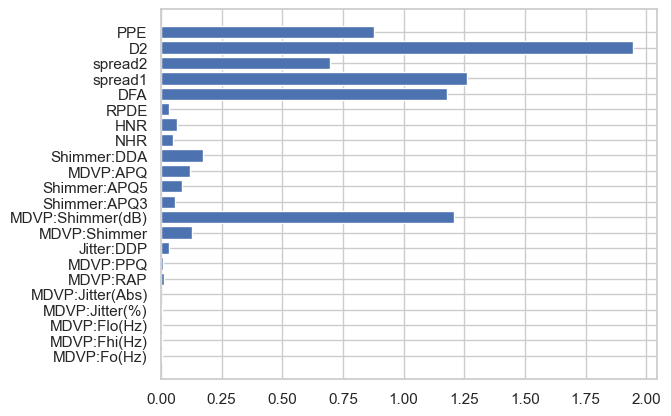

In [20]:
plt.barh(X.columns, coef)
plt.show()

## We can select the features with the highest magnitude coefficients 


In [21]:
best_columns=X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'spread1', 'MDVP:Shimmer(dB)', 'DFA', 'PPE'], dtype='object')

Confusion matrix, without normalization
[[ 3  4]
 [ 0 32]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


Accuracy Score: 0.8974358974358975


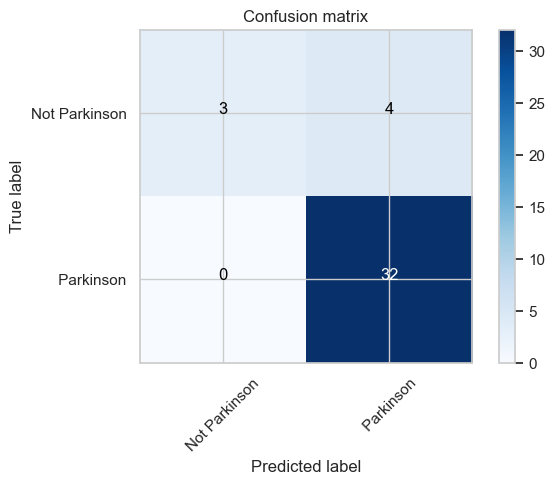

In [22]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


### We see many of the  features are redundant, identifying and removing redundant features can potentially help in a few ways.

### First, it can reduce the amount of data required for the model, which can reduce the cost of storing and processing data.

### Second, it can improve the performance of the model, allowing it to make more accurate predictions with fewer resources. This can help reduce the cost of misclassifications or errors in the predictions.

### Finally, it can also reduce the cost of model development and maintenance. Removing redundant features can simplify the model, making it easier to develop and maintain over time. It can also reduce the need for frequent updates and retraining, which can be costly in terms of time and resources


#  Random Forest Model



## Random Forest is a good choice for various machine learning tasks due to its high accuracy in classifying complex data patterns. The ability to interpret the results of Random Forest models also makes it easier to validate and understand the decisions it makes.


In [23]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
acc=accuracy_score(y_test, y_pred)

Accuracy: 94.87%


# Perform grid search for RandomForest to tune the parameters


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


<Axes: >

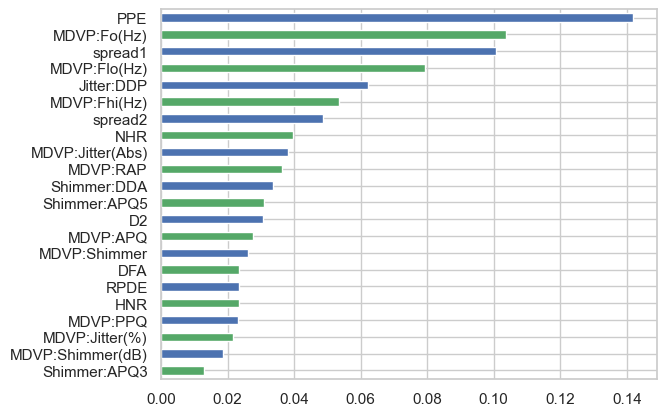

In [25]:
# plot the important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh',color=['g','b'])

Confusion matrix, without normalization
[[ 5  2]
 [ 0 32]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Accuracy Score: 0.9487179487179487


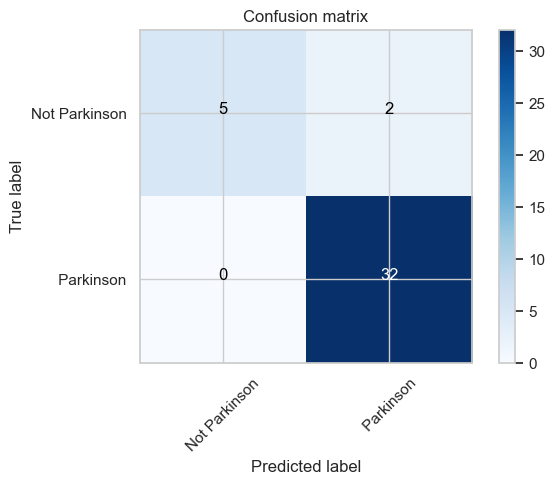

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


In [27]:
# import pickle

# # Save the model to a file
# filename = 'rf_model_parkinson'
# pickle.dump(rf, open(filename, "wb"))

# Visualizing the Decision Trees

## using the `dtreeviz` library, we are able to visualize the decision tree. This can contribute to better the understanding of the role of our variables in identifying Parkinson.

## At first, let's tune the parameters for the decision tree classifier:


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 0.8780241935483872


### Apply the parameters to model:


In [29]:

clf=grid_search.best_estimator_
#same as
#clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion= 'entropy')
#clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


Confusion matrix, without normalization
[[ 5  2]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39


Accuracy Score: 0.9230769230769231


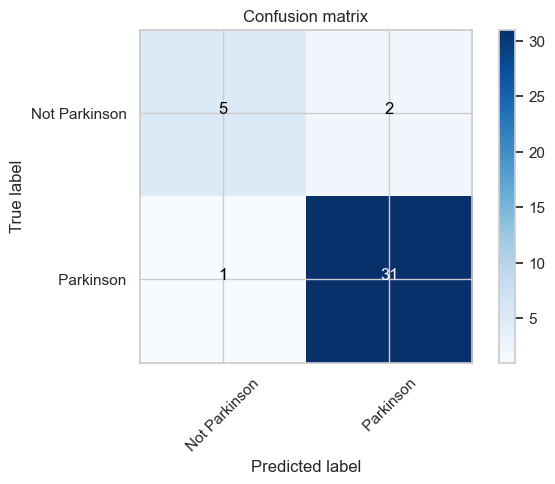

In [30]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [33]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))